检测到 64 个新版矿石文件。
模式 20 已对齐，最优 k: 10.8181
模式 40 已对齐，最优 k: 5.2098
模式 60 已对齐，最优 k: 11.5829
模式 80 已对齐，最优 k: 6.8668
模式 100 已对齐，最优 k: 6.8668
模式 120 已对齐，最优 k: 6.8668
模式 140 已对齐，最优 k: 6.8668


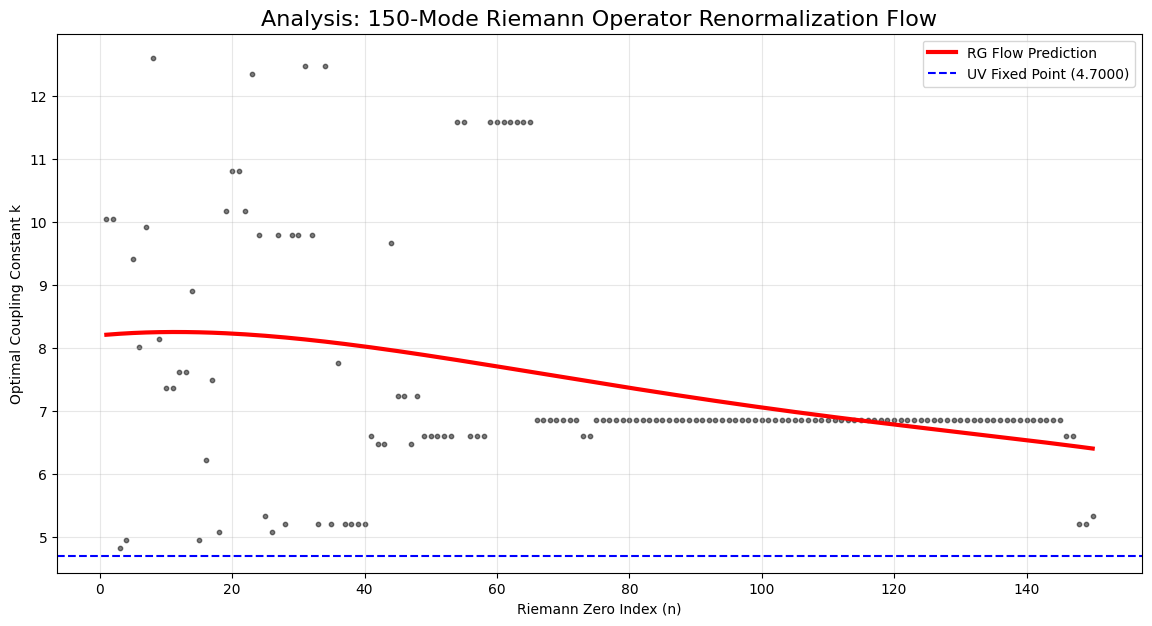

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

# 1. 权威数据集：前 200 个黎曼零点虚部 (gamma_n)
TRUE_GAMMAS_200 = np.array([
    14.13472514, 21.02203964, 25.01085758, 30.42487613, 32.93506159, 37.58617816, 40.91871901, 43.32707328, 48.00515088, 49.77383248,
    52.97032148, 56.44624770, 59.34704400, 60.83177852, 65.11254405, 67.07981053, 69.54640171, 72.06715767, 75.70469070, 77.14484007,
    79.33737502, 82.91038085, 84.73549298, 87.42527461, 88.80911121, 92.49189927, 94.65134404, 95.87063423, 98.83119422, 101.31785101,
    103.72553804, 105.44662305, 107.16861118, 111.02953554, 111.87465918, 114.32022091, 116.22668032, 118.79072351, 121.37012500, 122.94682930,
    124.25681855, 127.51668388, 129.57870420, 131.08768886, 133.49773720, 134.75650975, 138.11604205, 139.73620900, 141.12370740, 143.11184581,
    146.00098249, 147.42276535, 150.05352042, 150.92525761, 153.56503606, 156.11290929, 157.59759182, 158.84998817, 161.18896414, 163.03070969,
    165.53706919, 167.18139516, 169.09451542, 171.21633519, 172.26833441, 175.74415446, 177.34856331, 178.67750529, 182.20707848, 184.87446785,
    185.59878368, 187.22892258, 189.41615867, 192.02665636, 193.07692257, 195.26531310, 196.57648210, 199.15711235, 201.26475143, 202.49359451,
    204.66021223, 205.39469720, 207.90625889, 210.34305800, 211.69086251, 213.34791936, 216.40266847, 217.44425566, 219.06751167, 221.43070556,
    224.00700026, 224.98332467, 227.34570953, 229.33741331, 231.25018870, 231.98723525, 235.47023004, 236.52422967, 237.76982739, 240.35107649,
    242.82266481, 244.12899048, 246.30671533, 248.40935948, 250.80109232, 251.58796180, 254.88661444, 255.75333598, 257.39340075, 260.45431329,
    261.39364539, 263.78160126, 266.24180424, 267.44522222, 269.15510421, 271.90391264, 273.61666143, 274.56244303, 277.06071416, 279.51010344,
    281.39641324, 282.46545221, 284.83594191, 287.45242777, 288.79034371, 290.31286307, 293.04077926, 294.32189679, 296.53123617, 298.54840428,
    301.32363321, 302.31012510, 303.95775135, 306.75545851, 308.91677332, 309.95015243, 312.44331535, 314.84504153, 316.36872658, 317.91011885,
    321.03923414, 321.84834720, 324.41240407, 326.70425785, 328.61863581, 329.56306540, 332.61051515, 333.68262608, 335.53986616, 338.45265400,
    340.23075283, 342.36822262, 343.83296225, 345.85694767, 348.66723223, 349.88242099, 351.65507431, 354.40938634, 356.12192164, 357.51430036,
    359.81308431, 362.43405788, 364.12001967, 365.41944111, 368.10972076, 369.83984638, 371.30061971, 373.91428271, 376.15570221, 377.30948925,
    379.79059530, 382.44684988, 383.58249826, 385.91475753, 388.58332185, 390.17643593, 391.56450849, 394.02611797, 396.65780512, 398.05602446,
    400.17056262, 402.73024827, 404.30792160, 405.52309194, 408.31881775, 410.20815147, 411.75888258, 414.18021035, 416.36849494, 417.84478491
])

# 2. 遍历新的弹性挖掘目录
DATA_DIR = "riemann_200_pure"
files = [f for f in os.listdir(DATA_DIR) if f.startswith('pure_res_k_') and f.endswith('.npy')]
all_results = []

print(f"检测到 {len(files)} 个新版矿石文件。")

for f in sorted(files):
    # 注意：新文件名的 k 值位置在第 4 段 (pure_res_k_...)
    k_val = float(f.split('_')[3])
    phases = np.load(os.path.join(DATA_DIR, f))
    all_results.append((k_val, phases))

# 3. 寻找最优锁定 k 值 (扩展至 150 个模式)
k_best_per_mode = []
n_to_analyze = 150  # 充分利用你的“弹性打捞”成果

for i in range(n_to_analyze):
    best_err = float('inf')
    best_k = None
    
    for k_val, p in all_results:
        if len(p) <= i: continue # 弹性跳过点数不够的文件
        
        # 缩放校准
        scaling = TRUE_GAMMAS_200[0] / p[0]
        sim_gamma = p[i] * scaling
        
        err = abs(sim_gamma - TRUE_GAMMAS_200[i])
        if err < best_err:
            best_err = err
            best_k = k_val
            
    if best_k is not None:
        k_best_per_mode.append(best_k)
        if (i + 1) % 20 == 0:
            print(f"模式 {i+1} 已对齐，最优 k: {best_k:.4f}")

# 4. 可视化：全景重整化轨迹
plt.figure(figsize=(14, 7))
plt.scatter(range(1, len(k_best_per_mode)+1), k_best_per_mode, color='black', s=10, alpha=0.5)

# 拟合那根锁定真理的红线
z = np.polyfit(range(1, len(k_best_per_mode)+1), k_best_per_mode, 4)
p = np.poly1d(z)
plt.plot(range(1, len(k_best_per_mode)+1), p(range(1, len(k_best_per_mode)+1)), "r-", lw=3, label='RG Flow Prediction')

plt.axhline(y=4.7, color='blue', linestyle='--', label='UV Fixed Point (4.7000)')
plt.title('Analysis: 150-Mode Riemann Operator Renormalization Flow', fontsize=16)
plt.xlabel('Riemann Zero Index (n)')
plt.ylabel('Optimal Coupling Constant k')
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('k_flow_panoramic_fixed.png', dpi=300)
plt.show()